In [2]:
import pandas as pd
import os

In [3]:
def calculate_values(df,subject,method,order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    place_values=[[0.25,-0.1,0],[0.25,0.1,0],[0.5,-0.1,0],[0.5,0.1,0],[0.25,-0.1,-0.1],[0.25,0.1,-0.1],[0.5,-0.1,-0.1],[0.5,0.1,-0.1]]

    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
        else:
            results.append([
                subject,
                order,
                row_count,
                method,
                place_value,
                abs(float(data[i][0])-place_values[place_value][0]),
               abs(float(data[i][1])-place_values[place_value][1]),
              abs(float(data[i][2])-place_values[place_value][2]),
                ])
            row_count+=1
    return results
            
    
    
    

In [18]:
def calculate_values_averages(df,subject,method,order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    sum1, sum2, sum3 = 0, 0, 0
    tmp_rows = 0
    place_values=[[0.25,-0.1,0],[0.25,0.1,0],[0.5,-0.1,0],[0.5,0.1,0],[0.25,-0.1,-0.1],[0.25,0.1,-0.1],[0.5,-0.1,-0.1],[0.5,0.1,-0.1]]

    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
           
            if tmp_rows > 0:
                # 平均値を計算して結果リストに追加
                results.append([
                     subject,
                    order,
                    row_count,
                    method,
                    place_value,
                    abs(sum1 / tmp_rows-place_values[place_value][0]),
                    abs(sum2 / tmp_rows-place_values[place_value][1]),
                    abs(sum3 / tmp_rows-place_values[place_value][2]),
                ])
                row_count+=1
            # 次のブロックのために変数をリセット
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            # row_count=0
            sum1, sum2, sum3 = 0, 0, 0
            tmp_rows = 0
        else:
             # 各列の値を加算
            sum1 += float(data[i][0])
            sum2 += float(data[i][1])
            sum3 += float(data[i][2])
            tmp_rows += 1
    # 最後のブロックの平均値を計算して追加（ファイルの最後に count: がない場合）
    if tmp_rows > 0:
        results.append([
            subject,
            order,
            row_count,
            method,
            place_value,
            abs( sum1 / tmp_rows-place_values[place_value][0]), 
            abs(sum2 / tmp_rows-place_values[place_value][1]), 
            abs(sum3 / tmp_rows-place_values[place_value][2])    
        ])
      
    return results
            
    
    
    

In [19]:
import numpy as np

def calculate_values_median(df, subject, method, order):
    # データ範囲を取得
    data = df.values
    # 結果を出力する
    results = []
    place_value = 0
    row_count = 0
    place_values = [[0.25, -0.1, 0], [0.25, 0.1, 0], [0.5, -0.1, 0], [0.5, 0.1, 0], [0.25, -0.1, -0.1], [0.25, 0.1, -0.1], [0.5, -0.1, -0.1], [0.5, 0.1, -0.1]]

    values1, values2, values3 = [], [], []

    for i in range(len(data)):
        if isinstance(data[i][0], str) and data[i][0].startswith("place index:"):
            if values1:
                # 中央値を計算して結果リストに追加
                results.append([
                    subject,
                    order,
                    row_count,
                    method,
                    place_value,
                    abs(np.median(values1) - place_values[place_value][0]),
                    abs(np.median(values2) - place_values[place_value][1]),
                    abs(np.median(values3) - place_values[place_value][2]),
                ])
                row_count += 1
            # 次のブロックのために変数をリセット
            place_text, place_value = data[i][0].split(":")
            place_value = int(place_value)
            row_count = 0
            values1, values2, values3 = [], [], []
        else:
            # 各列の値をリストに追加
            values1.append(float(data[i][0]))
            values2.append(float(data[i][1]))
            values3.append(float(data[i][2]))
            row_count += 1

    # 最後のブロックの中央値を計算して追加（ファイルの最後に count: がない場合）
    if values1:
        results.append([
            subject,
            order,
            row_count,
            method,
            place_value,
            abs(np.median(values1) - place_values[place_value][0]),
            abs(np.median(values2) - place_values[place_value][1]),
            abs(np.median(values3) - place_values[place_value][2])
        ])

    return results


In [20]:

# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [21]:
import pathlib
import datetime
# 全てのフォルダを処理し、結果を統合
all_results = []
def calculate_all_folders(files_paths,subject_name,sorted_indices):
    for i, file_path in enumerate(files_paths):
            method=i-1
          
            order=sorted_indices.index(i-1)
            df = read_txt_to_dataframe(file_path)
            all_results.extend(calculate_values_averages(df,subject_name, method,order))
            # all_results.extend(calculate_values(df,subject_name, method,order))
            
            # all_results.extend(calculate_values_median(df,subject_name, method,order))

In [22]:
import os
from datetime import datetime

# ファイルの作成日時を取得する関数
def get_creation_time(file_name):
    return os.path.getctime(file_name)


In [23]:

subject_names=["朴さん","水上","佐々木","歩さん","万くん","竹村君","平岡拓海","吉村厚紀","岡本","菊池たくま"]

# subject_names=["菊池たくま"]

for i in range(len(subject_names)):
        root_path = r"C:\Users\takaharayota\Research\Exp1-data\{}\values".format(subject_names[i])
        files_paths = [
                root_path + r"\音無し.txt",
        
        root_path + r"\離散指数.txt",
        root_path + r"\連続指数.txt",
        root_path + r"\連続線形.txt",
                root_path + r"\離散線形.txt",
        
        ]
        # ファイル名と元のインデックスのタプルのリストを作成
        indexed_files = list(enumerate(files_paths))
        # 作成日時順に並べ替える
        sorted_indexed_files = sorted(indexed_files, key=lambda x: get_creation_time(x[1]))
        # 並べ替え後のインデックスを抽出
        sorted_indices = [index-1 for index, file in sorted_indexed_files]
        calculate_all_folders(files_paths,subject_names[i],sorted_indices)


    
print(all_results)  



# 統合されたデータをデータフレームに変換
columns = ['Subject','Order','Count','Method', 'Place', 'X', 'Y', 'Z']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output-ave.txt', sep='\t', index=False)

print("DataFrameの内容がoutput-ave.txtに出力されました。")


[['朴さん', 0, 0, -1, 0, 0.05870122, 0.016592839999999984, 0.006764353799999999], ['朴さん', 0, 1, -1, 1, 0.05048764, 0.07312832, 0.05785393800000001], ['朴さん', 0, 2, -1, 2, 0.13487264, 0.053605966000000005, 0.0335050884], ['朴さん', 0, 3, -1, 3, 0.05144652000000005, 0.002121287999999999, 0.056653194], ['朴さん', 4, 0, 0, 3, 0.014364560000000026, 0.0048071399999999875, 0.021810794], ['朴さん', 4, 1, 0, 1, 0.0028730399999999656, 0.005554516000000009, 0.0058565260800000005], ['朴さん', 4, 2, 0, 2, 0.0001293399999999778, 0.0037751619999999986, 0.01771147], ['朴さん', 4, 3, 0, 0, 0.0023988000000000342, 0.0032504540000000137, 0.0049719136], ['朴さん', 1, 0, 1, 0, 0.002889059999999999, 0.003915039999999995, 0.0080433828], ['朴さん', 1, 1, 1, 2, 0.002072940000000023, 0.0077996740000000064, 0.040900915999999995], ['朴さん', 1, 2, 1, 1, 5.2999999999997494e-05, 0.00016247799999999368, 0.00510637002], ['朴さん', 1, 3, 1, 3, 0.012701720000000027, 0.011281176000000004, 0.064266322], ['朴さん', 2, 0, 2, 1, 0.02352902000000001, 0.005145

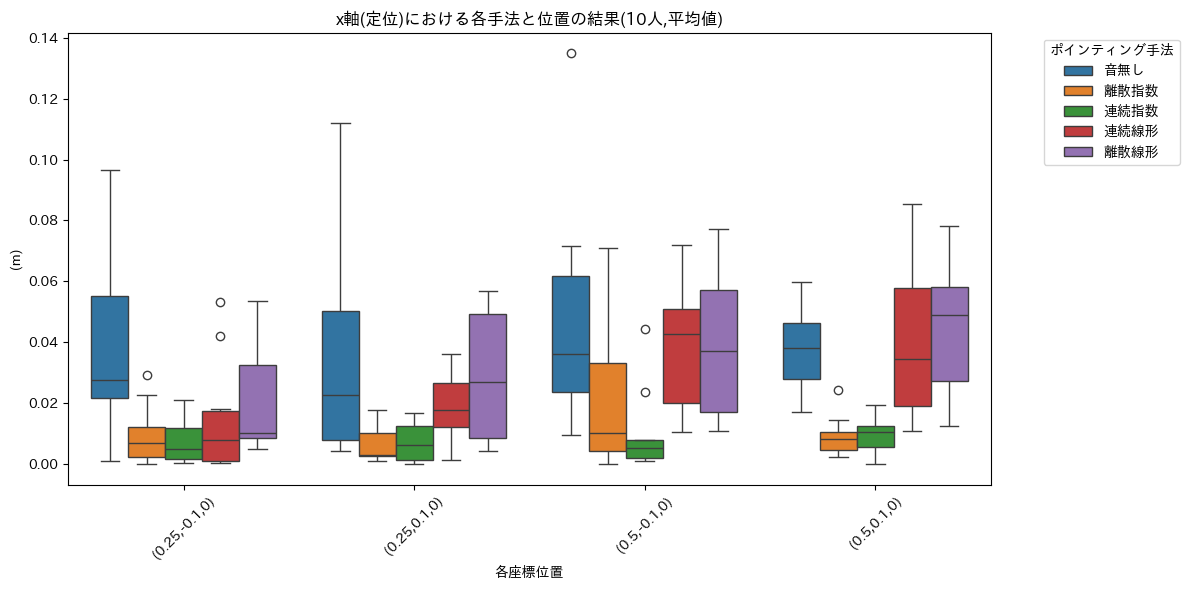

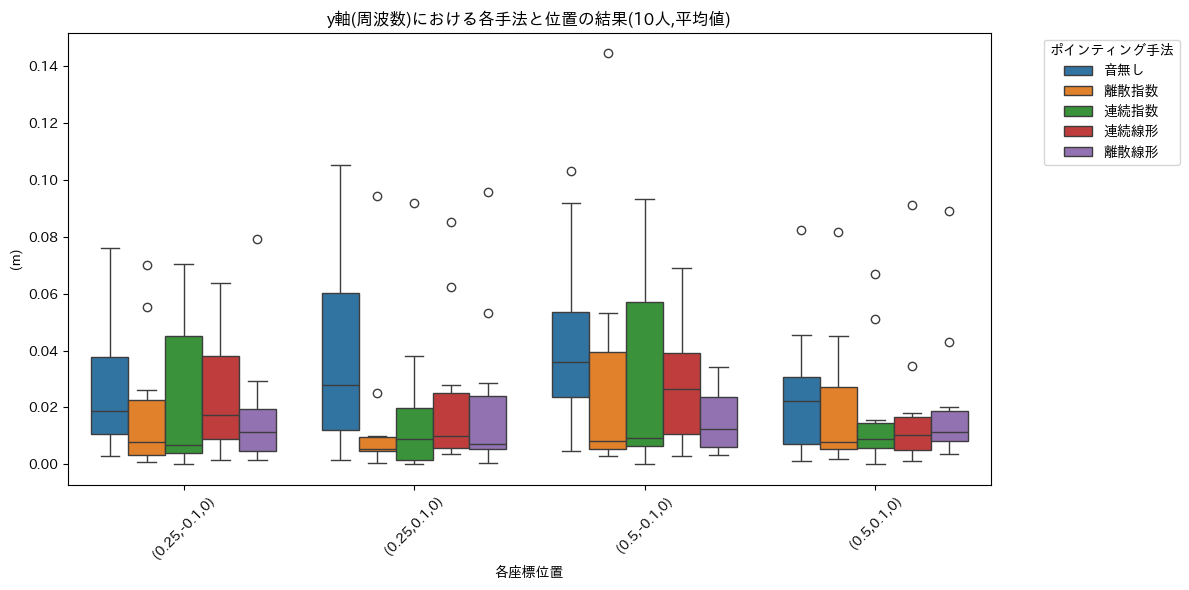

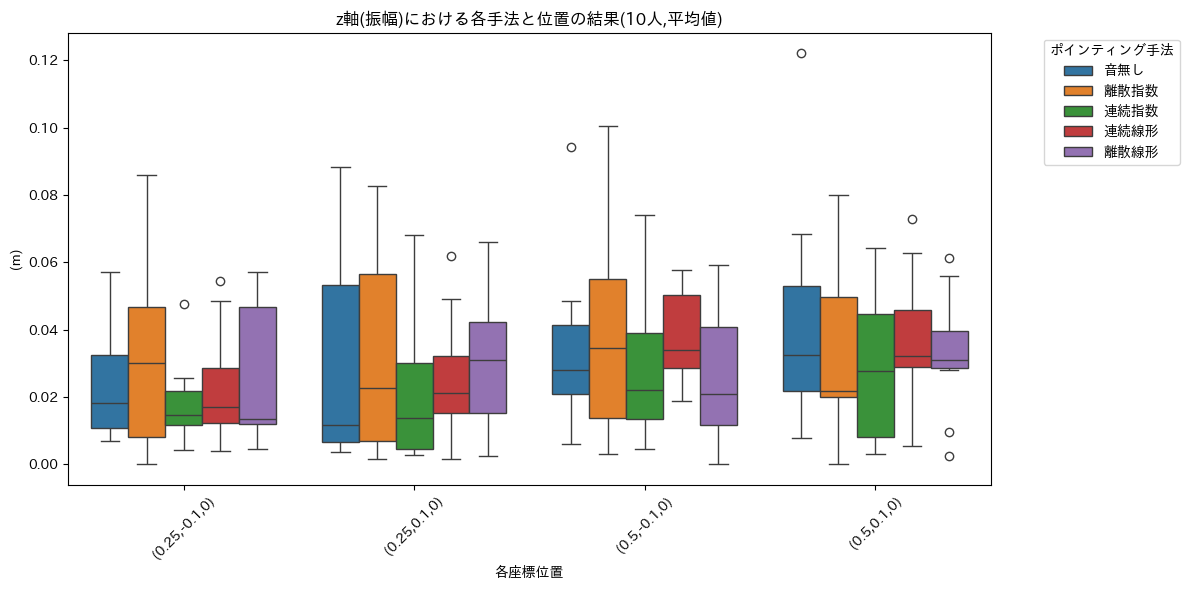

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音無し',
    0: '離散指数',
    1: '連続指数',
    2: '連続線形',
    3: '離散線形',


}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='X', hue='Method_Label', data=df_all)
plt.title('x軸(定位)における各手法と位置の結果(10人,平均値)')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Y', hue='Method_Label', data=df_all)
plt.title('y軸(周波数)における各手法と位置の結果(10人,平均値)')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Z', hue='Method_Label', data=df_all)
plt.title('z軸(振幅)における各手法と位置の結果(10人,平均値)')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\takaharayota\AppData\Local\Temp\ipykernel_24176\941971040.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')


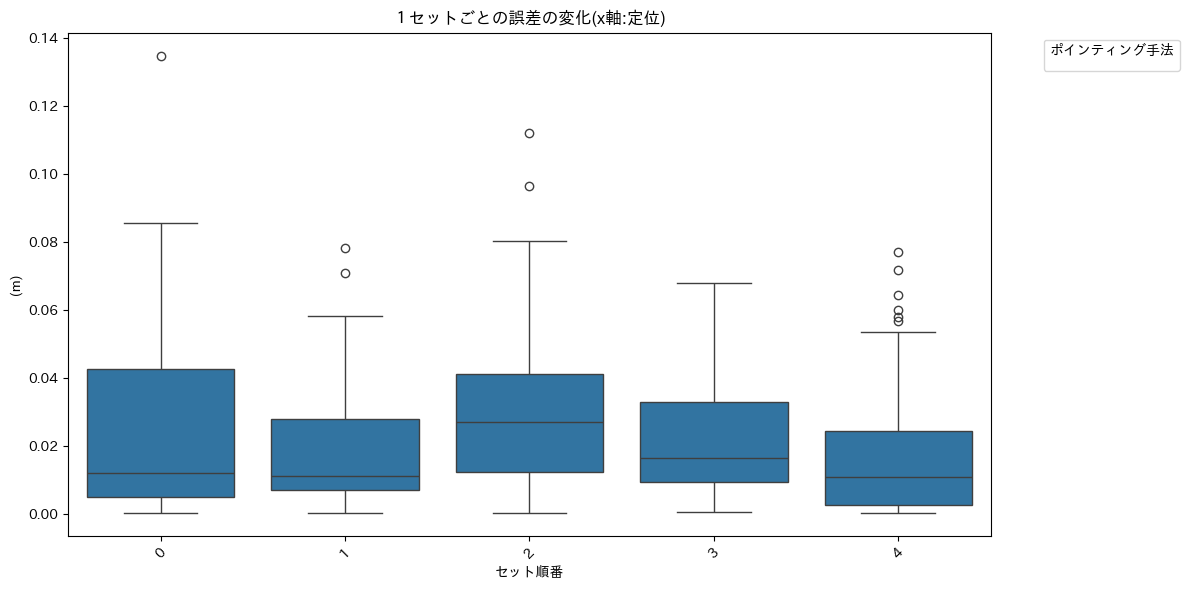

C:\Users\takaharayota\AppData\Local\Temp\ipykernel_24176\941971040.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')


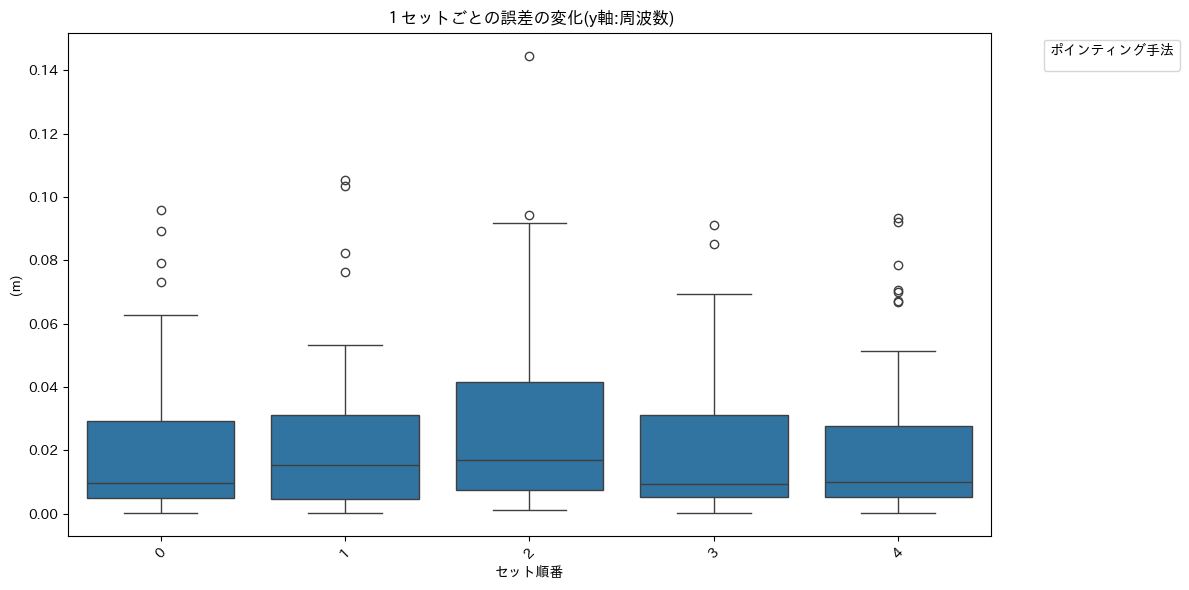

C:\Users\takaharayota\AppData\Local\Temp\ipykernel_24176\941971040.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')


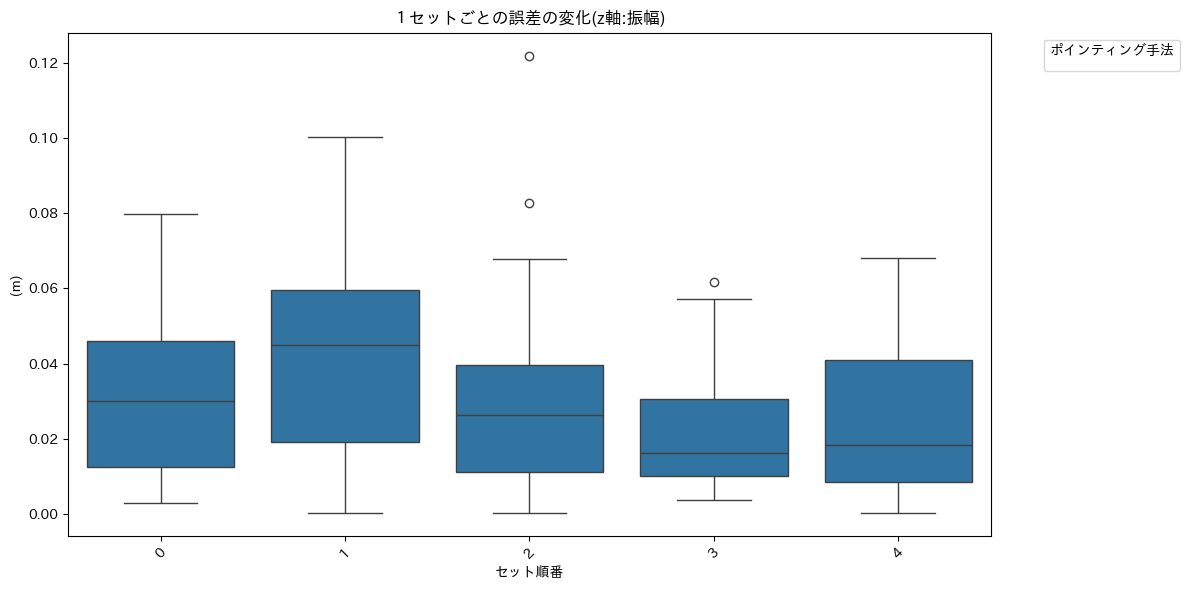

In [27]:
# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Order', y='X', data=df_all)
plt.title('１セットごとの誤差の変化(x軸:定位)')
plt.xlabel('セット順番')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Order', y='Y', data=df_all)
plt.title('１セットごとの誤差の変化(y軸:周波数)')
plt.xlabel('セット順番')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Order', y='Z',data=df_all)
plt.title('１セットごとの誤差の変化(z軸:振幅)')
plt.xlabel('セット順番')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
